In [1]:
import pandas as pd
import numpy as np

### The Pandas Series Object

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

From what we’ve seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the NumPy array has an implicitly defned integer index used to access the values, the Pandas Series has an explicitly defned index associated with the values.
This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
data['b']

0.5

We can even use noncontiguous or nonsequential indices:

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [10]:
data[5]

0.5

### Series as specialized dictionary
In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure that maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information
of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.
We can make the Series-as-dictionary analogy even more clear by constructing a Series object directly from a Python dictionary:

In [11]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a Series will be created where the index is drawn from the sorted keys. From here, typical dictionary-style item access can be performed:

In [12]:
population['California']

38332521

Unlike a dictionary, though, the Series also supports array-style operations such as slicing:

In [13]:
population['Texas':'Illinois']

Texas       26448193
New York    19651127
Florida     19552860
Illinois    12882135
dtype: int64

### Constructing Series objects
For example, data can be a list or NumPy array, in which case index defaults to an integer sequence:

In [14]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

data can be a scalar, which is repeated to fill the specified index:

In [15]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

data can be a dictionary, in which index defaults to the sorted dictionary keys:


In [16]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the Series is populated only with the explicitly identified keys.

### The Pandas Index Object
If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a
sequence of aligned Series objects. Here, by “aligned” we mean that they share the same index.

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 
             'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [19]:
states = pd.DataFrame({'population': population,
                        'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the Series object, the DataFrame has an index attribute that gives access to the index labels:

In [20]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the DataFrame has a columns attribute, which is an Index object holding the column labels:

In [21]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

#### DataFrame as specialized dictionary
Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object
containing the areas we saw earlier:

In [22]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimensional NumPy array, data[0] will return the first row. For a DataFrame, data['col0'] will return the first column. Because of this, it is probably better to think about DataFrames as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful. 

#### Constructing DataFrame objects
A Pandas DataFrame can be constructed in a variety of ways. Here we’ll give several examples.

**From a single Series object.** A DataFrame is a collection of Series objects, and a singlecolumn DataFrame can be constructed from a single Series:

In [23]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


**From a list of dicts.** Any list of dictionaries can be made into a DataFrame. We’ll use a simple list comprehension to create some data:

In [24]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e., “not a number”) values:

In [25]:
 pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


**From a dictionary of Series objects.** As we saw before, a DataFrame can be constructed from a dictionary of Series objects as well:

In [26]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


**From a two-dimensional NumPy array.** Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each:

In [27]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.145162,0.521010
b,0.764852,0.055235
c,0.946733,0.824080


**From a NumPy structured array.** A Pandas DataFrame operates much like a structured array, and can be created directly from one:

In [28]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [29]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object
We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multiset, as Index objects may contain repeated values).
Those views have some interesting consequences in the operations available on Index objects. As a simple example, let’s construct an Index from a list of integers:

In [30]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### Index as immutable array
The Index object in many ways operates like an array. For example, we can use standard Python indexing notation to retrieve values or slices:

In [31]:
ind[1]

3

In [32]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

Index objects also have many of the attributes familiar from NumPy arrays:

In [33]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between Index objects and NumPy arrays is that indices are immutable—that is, they cannot be modified via the normal means:

In [34]:
ind[1]=0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple DataFrames and arrays, without the potential for side effects from inadvertent index modification.
#### Index as ordered set
Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic. The Index object follows many of he conventions used by Python’s built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [35]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [36]:
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [37]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [38]:
indA ^ indB # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

These operations may also be accessed via object methods—for example, indA.intersection(indB).

### Data Indexing and Selection
#### Data Selection in Series
##### Series as dictionary
Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values:

In [39]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [40]:
data['b']

0.5

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

In [41]:
'a' in data

True

In [42]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [43]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series objects can even be modified with a dictionary-like syntax. Just as you can extend a dictionary by assigning to a new key, you can extend a Series by assigning to a new index value:

In [44]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

This easy mutability of the objects is a convenient feature: under the hood, Pandas is making decisions about memory layout and data copying that might need to take place; the user generally does not need to worry about these issues.
#### Series as one-dimensional array
A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays—that is, _slices, masking, and fancy indexing_. Examples of these are as follows:

In [45]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [46]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [47]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [48]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix
These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.

In [49]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [50]:
# explicit index when indexing
data[1]

'a'

In [51]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular slicing interface tothe data in the Series.

First, the **loc** attribute allows indexing and slicing that always references the explicit index:

In [52]:
data.loc[1]

'a'

In [53]:
data.loc[1:3]

1    a
3    b
dtype: object

The **iloc** attribute allows indexing and slicing that always references the implicit Python-style index:

In [54]:
data.iloc[1]

'b'

In [55]:
data.iloc[1:3]

3    b
5    c
dtype: object

A third indexing attribute, ix, is a hybrid of the two, and for Series objects is equivalent to standard []-based indexing. The purpose of the ix indexer will become more apparent in the context of DataFrame objects, which we will discuss in a moment.

**So, this is what you need to remember:**

**.loc** takes slices based on labels. **.iloc** uses observations’ position. **.ix** uses both labels and positions.

**.loc** includes last element, when using an interval slice (e.g, [“a”:”c”]). .iloc does not include last element.

When using a integer based index be clear with what you want and avoid confusion by appropriately selecting **.loc** or **iloc** for the task. Avoid using **.ix**.

### Data Selection in DataFrame
#### DataFrame as a dictionary
The first analogy we will consider is the DataFrame as a dictionary of related Series objects. Let’s return to our example of areas and populations of states:

In [56]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})

pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name:

In [57]:
#Dictionary sytle
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [58]:
#attribute style
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [59]:
data.area is data['area']

True


Though this is a useful shorthand, keep in mind that it does not work for all cases! For example, if the column names are not strings, or if the column names conflict with methods of the DataFrame, this attribute-style access is not possible. For example, the DataFrame has a pop() method, so data.pop will point to this rather than the "pop" column:

In [60]:

data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute **_(i.e., use data['pop'] = z rather than data.pop = z)_**.

Like with the Series objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case to add a new column:

In [61]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### DataFrame as two-dimensional array
As mentioned previously, we can also view the DataFrame as an enhanced two-dimensional array. We can examine the raw underlying data array using the values attribute:

In [62]:
data.values


array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

With this picture in mind, we can do many familiar array-like observations on the DataFrame itself. For example, we can transpose the full DataFrame to swap rows and columns:

In [63]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of DataFrame objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array. In particular, passing a single index to an array accesses a row:

In [64]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

and passing a single “index” to a DataFrame accesses a column:

In [65]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Thus for array-style indexing, we need another convention. Here Pandas again uses the loc, iloc, and ix indexers mentioned earlier. Using the iloc indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result:

In [66]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [67]:
data.loc[:'Florida', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


The ix indexer allows a hybrid of these two approaches:

In [68]:
data.ix[:3, :'pop']

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Keep in mind that for integer indices, the ix indexer is subject to the same potential sources of confusion as discussed for integer-indexed Series objects.

Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the loc indexer we can combine masking and fancy indexing as in the following:

In [69]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


#### Additional indexing conventions
There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice. First, while _indexing_ refers to columns, _slicing_ refers to rows:

In [70]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index:

In [71]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [72]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


### Operating on Data in Pandas
One of the essential pieces of NumPy is the ability to perform quick element-wiseoperations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.). Pandas inherits much of this functionality from NumPy, and the ufuncs.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output, and for binary operations such as addition and multiplication, Pandas will
automatically align indices when passing the objects to the ufunc. This means that keeping the context of data and combining data from different sources—both potentially error-prone tasks with raw NumPy arrays—become essentially foolproof ones with Pandas. We will additionally see that there are well-defined operations between one-dimensional Series structures and two-dimensional DataFrame structures.

#### Ufuncs: Index Preservation
Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects. Let’s start by defining a simple Series and DataFrame on which to demonstrate this:

In [73]:
import pandas as pd
import numpy as np

In [74]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [75]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object _with the indices preserved:_

In [76]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Or, for a slightly more complex calculation:

In [77]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment
For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation. This is very convenient when you are working with incomplete data, as we’ll see in some of the examples that follow.
#### Index alignment in Series
As an example, suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population:

In [78]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Let’s see what happens when we divide these to compute the population density:

In [79]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [80]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [81]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, we can modify the fill value using appropriate object methods in place of the operators. For example, calling A.add(B) is equivalent to calling A + B, but allows optional explicit specification of the fill value for any elements in A or B that might be missing:

In [82]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index alignment in DataFrame
A similar type of alignment takes place for both columns and indices when you are performing operations on DataFrames:

In [83]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [84]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [85]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [86]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### Ufuncs: Operations Between DataFrame and Series
When you are performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [87]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [88]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [89]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [90]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [91]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [92]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


### Handling Missing Data
Here and throughout the book, we’ll refer to missing data in general as null, NaN, or NA values.
#### None: Pythonic missing data
The first sentinel value used by Pandas is None, a Python singleton object that is often used for missing data in Python code. Because None is a Python object, it cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object' (i.e., arrays of Python objects):

In [93]:
import numpy as np
import pandas as pd

In [94]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This dtype=object means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects. While this kind of object array is useful for some purposes, any operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types:

In [95]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
129 ms ± 7.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
4.89 ms ± 403 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



The use of Python objects in an array also means that if you perform aggregations like sum() or min() across an array with a None value, you will generally get an error:

In [96]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: Missing numerical data
The other missing data representation, NaN (acronym for Not a Number), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [98]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code. You should be aware that NaN is a bit like a data virus—it infects any other object it touches. Regardless of the operation, the result of arithmetic with NaN will be another NaN:

In [99]:
1 + np.nan

nan

In [100]:
0 * np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don’t result in an error) but not always useful:

In [101]:
vals2.sum(), vals2.min(), vals2.max()

C:\Users\Michael\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\Michael\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [102]:
 np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that NaN is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.
#### NaN and None in Pandas
NaN and None both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [103]:
 pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don’t have an available sentinel value, Pandas automatically type-casts when NA values are present. For example, if we set a value in an integer array to np.nan, it will automatically be upcast to a floating-point type to accommodate the NA:

In [104]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [105]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the None to a NaN value.

#### Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

isnull()

    Generate a Boolean mask indicating missing values
    
notnull()

    Opposite of isnull()
    
dropna()

    Return a filtered version of the data
    
fillna()

    Return a copy of the data with missing values filled or imputed
    
We will conclude this section with a brief exploration and demonstration of these routines.

#### Detecting null values
Pandas data structures have two useful methods for detecting null data: **isnull()** and **notnull()**. Either one will return a Boolean mask over the data. For example:

In [106]:
data = pd.Series([1, np.nan, 'hello', None])

In [107]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [108]:
 data[data.notnull()]

0        1
2    hello
dtype: object

The isnull() and notnull() methods produce similar Boolean results for Data Frames.

#### Dropping null values
In addition to the masking used before, there are the convenience methods, dropna() (which removes NA values) and fillna() (which fills in NA values). For a Series, the result is straightforward:

In [109]:
data.dropna()

0        1
2    hello
dtype: object

In [110]:
df = pd.DataFrame([[1, np.nan, 2],
              [2, 3, 5],
              [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so dropna() gives a number of options for a DataFrame.
By default, dropna() will drop all rows in which any null value is present:

In [111]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; axis=1 drops all columns containing a null value:

In [112]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [113]:
df.dropna(how ='any')

,0,1,2
1,2.0,3.0,5


In [114]:
df.dropna(how ='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [115]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [116]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [117]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two nonnull values.

#### Filling null values
Sometimes rather than dropping NA values, you’d rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the isnull() method as a mask, but because it is such a common operation Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

In [118]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [119]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [120]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

For DataFrames, the options are similar, but we can also specify an axis along which the fills take place:

In [121]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [122]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains.

In [123]:
import pandas as pd
import numpy as np

In [124]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index:

In [125]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

But the convenience ends there. For example, if you need to select all values from 2010, you’ll need to do some messy (and potentially slow) munging to make it happen:

In [126]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

This produces the desired result, but is not as clean (or as efficient for large datasets) as the slicing syntax we’ve grown to love in Pandas.

#### The better way: Pandas MultiIndex
Fortunately, Pandas provides a better way. Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas MultiIndex type gives us the type of operations we wish to have. We can create a multi-index from the tuples as follows:

In [127]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

Notice that the MultiIndex contains multiple levels of indexing—in this case, the state names and the years, as well as multiple labels for each data point which encode these levels.

If we reindex our series with this MultiIndex, we see the hierarchical representation of the data:

In [128]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Here the first two columns of the Series representation show the multiple index values, while the third column shows the data. Notice that some entries are missing in the first column: in this multi-index representation, any blank entry indicates the
same value as the line above it.

Now to access all data for which the second index is 2010, we can simply use the Pandas slicing notation:

In [129]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

The result is a singly indexed array with just the keys we’re interested in. This syntax is much more convenient (and the operation is much more efficient!) than the homespun tuple-based multi-indexing solution that we started with. We’ll now further discuss this sort of indexing operation on hierarchically indexed data.
#### MultiIndex as extra dimension
You might notice something else here: we could easily have stored the same data using a simple DataFrame with index and column labels. In fact, Pandas is built with this equivalence in mind. The unstack() method will quickly convert a multiplyindexed Series into a conventionally indexed DataFrame:

In [130]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Naturally, the stack() method provides the opposite operation:

In [131]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [132]:
 pop_df = pd.DataFrame({'total': pop,
                        'under18': [9267089, 9284094,
                                    4687374, 4318033,
                                    5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [133]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Methods of MultiIndex Creation
The most straightforward way to construct a multiply indexed Series or DataFrame is to simply pass a list of two or more index arrays to the constructor. For example:

In [134]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.986545  0.702909
  2  0.209080  0.636198
b 1  0.590367  0.415860
  2  0.729123  0.735207

In [135]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [136]:
pd.Series(data).unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


#### Explicit MultiIndex constructors
For more flexibility in how the index is constructed, you can instead use the class method constructors available in the pd.MultiIndex. For example, as we did before, you can construct the MultiIndex from a simple list of arrays, giving the index values within each level:

In [137]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

You can construct it from a list of tuples, giving the multiple index values of each point:

In [138]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

You can even construct it from a Cartesian product of single indices:

In [139]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Similarly, you can construct the MultiIndex directly using its internal encoding by passing levels (a list of lists containing available index values for each level) and labels (a list of lists that reference these labels):

In [140]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

#### MultiIndex level names
Sometimes it is convenient to name the levels of the MultiIndex. You can accomplish this by passing the names argument to any of the above MultiIndex constructors, or by setting the names attribute of the index after the fact:

In [141]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

With more involved datasets, this can be a useful way to keep track of the meaning of various index values.
#### MultiIndex for columns
In a DataFrame, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well. Consider the following, which is a mock-up of some (somewhat realistic) medical data:

In [142]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.0  50.0  37.7  28.0  36.7
     2      36.0  37.3  26.0  35.5  26.0  35.7
2014 1      42.0  36.8  37.0  36.0  34.0  36.4
     2      25.0  36.1  56.0  37.4  34.0  36.1

In [143]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      50.0  37.7
     2      26.0  35.5
2014 1      37.0  36.0
     2      56.0  37.4

### Indexing and Slicing a MultiIndex
#### Multiply indexed Series
Consider the multiply indexed Series of state populations we saw earlier:

In [144]:
pop['California', 2000]

33871648

The MultiIndex also supports _partial indexing_, or indexing just one of the levels in the index. The result is another Series, with the lower-level indices maintained:

In [145]:
 pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [146]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

With sorted indices, we can perform partial indexing on lower levels by passing an empty slice in the first index:

In [147]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [148]:
 pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Selection based on fancy indexing also works:

In [149]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames
A multiply indexed DataFrame behaves in a similar manner. Consider our toy medical DataFrame from before:

In [150]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.0  50.0  37.7  28.0  36.7
     2      36.0  37.3  26.0  35.5  26.0  35.7
2014 1      42.0  36.8  37.0  36.0  34.0  36.4
     2      25.0  36.1  56.0  37.4  34.0  36.1

In [151]:
health_data['Guido', 'HR']

year  visit
2013  1        50.0
      2        26.0
2014  1        37.0
      2        56.0
Name: (Guido, HR), dtype: float64

In [152]:
 health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      45.0  37.0
     2      36.0  37.3

In [153]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        45.0
      2        36.0
2014  1        42.0
      2        25.0
Name: (Bob, HR), dtype: float64

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error:

In [154]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-154-fb34fa30ac09>, line 1)

You could get around this by building the desired slice explicitly using Python’s builtin slice() function, but a better way in this context is to use an IndexSlice object, which Pandas provides for precisely this situation. 

In [155]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,45.0,50.0,28.0
2014,1,42.0,37.0,34.0


### Rearranging Multi-Indices
#### Sorted and unsorted indices
Earlier, we briefly mentioned a caveat, but we should emphasize it more here. _Many of the MultiIndex slicing operations will fail if the index is not sorted_. Let’s take a look at this here.
We’ll start by creating some simple multiply indexed data where the indices are _not lexographically sorted:_


In [156]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.012541
      2      0.595189
c     1      0.923177
      2      0.880255
b     1      0.908409
      2      0.941204
dtype: float64

If we try to take a partial slice of this index, it will result in an error:

In [157]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


For various reasons, partial slices and other similar operations require the levels in the MultiIndex to be in sorted (i.e., lexographical) order. Pandas provides a number of convenience routines to perform this type of sorting; examples are the sort_index() and sortlevel() methods of the DataFrame. We’ll use the simplest, sort_index(), here:

In [158]:
data = data.sort_index()
data

char  int
a     1      0.012541
      2      0.595189
b     1      0.908409
      2      0.941204
c     1      0.923177
      2      0.880255
dtype: float64

With the index sorted in this way, partial slicing will work as expected:

In [159]:
data['a':'b']

char  int
a     1      0.012541
      2      0.595189
b     1      0.908409
      2      0.941204
dtype: float64

#### Stacking and unstacking indices
It is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use:

In [160]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [161]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [162]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Index setting and resetting
Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the reset_index method. Calling this on the population dictionary will result in a DataFrame with a state and year column holding the information that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation:

In [163]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when you are working with data in the real world, the raw input data looks like this and it’s useful to build a MultiIndex from the column values. This can be done with the set_index method of the DataFrame, which returns a multiply indexed Data Frame:

In [164]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices
We’ve previously seen that Pandas has built-in data aggregation methods, such as mean(), sum(), and max(). For hierarchically indexed data, these can be passed a level parameter that controls which subset of the data the aggregate is computed on.

In [165]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.0  50.0  37.7  28.0  36.7
     2      36.0  37.3  26.0  35.5  26.0  35.7
2014 1      42.0  36.8  37.0  36.0  34.0  36.4
     2      25.0  36.1  56.0  37.4  34.0  36.1

Perhaps we’d like to average out the measurements in the two visits each year. We can do this by naming the index level we’d like to explore, in this case the year:

In [166]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     40.5  37.15  38.0  36.6  27.0  36.20
2014     33.5  36.45  46.5  36.7  34.0  36.25

By further making use of the axis keyword, we can take the mean among levels on the columns as well:

In [167]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,35.166667,36.650000
2014,38.000000,36.466667


### Combining Datasets: Concat and Append
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets. Series and DataFrames are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

In [168]:
import pandas as pd
import numpy as np

In [169]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)
    
# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### Recall: Concatenation of NumPy Arrays
Concatenation of Series and DataFrame objects is very similar to concatenation of NumPy arrays, which can be done via the np.concatenate function. Recall that with it, you can combine the contents of two or more arrays into a single array:

In [170]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate. Additionally, it takes an axis keyword that allows you to specify the axis along which the result will be concatenated:

In [171]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Recall: Concatenation of NumPy Arrays
Pandas has a function, pd.concat(), which has a similar syntax to np.concatenate but contains a number of options.

In [172]:
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

NameError: name 'objs' is not defined

pd.concat() can be used for a simple concatenation of Series or DataFrame objects, just as np.concatenate() can be used for simple concatenations of arrays:

In [173]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as DataFrames:

In [174]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


By default, the concatenation takes place row-wise within the DataFrame (i.e., axis=0). Like np.concatenate, pd.concat allows specification of an axis along which concatenation will take place. Consider the following example:

In [175]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='col'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1


ValueError: No axis named col for object type <class 'pandas.core.frame.DataFrame'>

One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices, even if the result will have duplicate indices! Consider this simple example:

In [176]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


Notice the repeated indices in the result. While this is valid within DataFrames, the outcome is often undesirable. pd.concat() gives us a few ways to handle it
**Catching the repeats as an error**. If you’d like to simply verify that the indices in the result of pd.concat() do not overlap, you can specify the verify_integrity flag. With this set to True, the concatenation will raise an exception if there are duplicate indices. Here is an example, where for clarity we’ll catch and print the error message:

In [177]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


**Ignoring the index**. Sometimes the index itself does not matter, and you would prefer it to simply be ignored. You can specify this option using the ignore_index flag. With this set to True, the concatenation will create a new integer index for the resulting Series:

In [178]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


**Adding MultiIndex keys**. Another alternative is to use the keys option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data:

In [179]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


#### Concatenation with joins
We just looked at, we were mainly concatenating DataFrames with shared column names. In practice, data from different sources might have different sets of column names, and pd.concat offers several options in this case. Consider the concatenation of the following two DataFrames, which have some (but not all!) columns in common:

In [180]:
df7 = make_df('ABC', [1, 2])
df8 = make_df('BCD', [3, 4])
print(df7); print(df8);

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [181]:
 print(pd.concat([df7, df8])

SyntaxError: unexpected EOF while parsing (<ipython-input-181-558f9069ef2d>, line 1)

By default, the entries for which no data is available are filled with NA values. To change this, we can specify one of several options for the join and join_axes parameters of the concatenate function. By default, the join is a union of the input columns (join='outer'), but we can change this to an intersection of the columns using join='inner':

In [182]:
print(df7); print(df8);
print(pd.concat([df7, df8], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


Another option is to directly specify the index of the remaining colums using the join_axes argument, which takes a list of index objects. Here we’ll specify that the returned columns should be the same as those of the first input:

In [183]:
print(df7); print(df8);
print(pd.concat([df7, df8], join_axes=[df7.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


#### The append() method
Because direct array concatenation is so common, Series and DataFrame objects have an append method that can accomplish the same thing in fewer keystrokes. For example, rather than calling pd.concat([df1, df2]), you can simply call df1.append(df2):

In [184]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


Keep in mind that unlike the append() and extend() methods of Python lists, the append() method in Pandas does not modify the original object—instead, it creates a new object with the combined data. It also is not a very efficient method, because it involves creation of a new index and data buffer. Thus, if you plan to do multiple append operations, it is generally better to build a list of DataFrames and pass them all at once to the concat() function.

### Combining Datasets: Merge and Join
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations. If you have ever worked with databases, you should be familiar with this type of data interaction. The main interface for this is the pd.merge function.

#### Relational Algebra
The behavior implemented in pd.merge() is a subset of what is known as relational algebra, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases. The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset. With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building blocks in the pd.merge() function and the related join() method of Series and DataFrames. As we will see, these let you efficiently link data from different sources.
#### Categories of Joins
The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins. All three types of joins are accessed via an identical call to the pd.merge() interface; the type of join performed depends on the form of the input data. Here we will show simple examples of the three types of merges, and discuss detailed options further below.
#### One-to-one joins
Perhaps the simplest type of merge expression is the one-to-one join, which is in many ways very similar to the column-wise concatenation.

In [185]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print('df1', df1); print('df2', df2)

df1   employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
df2   employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


To combine this information into a single DataFrame, we can use the pd.merge() function:

In [186]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The pd.merge() function recognizes that each DataFrame has an “employee” column, and automatically joins using this column as a key. The result of the merge is a new DataFrame that combines the information from the two inputs. Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the “employee” column differs between df1 and df2, and the pd.merge() function correctly accounts for this. Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index.
#### Many-to-one joins
Many-to-one joins are joins in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. Consider the following example of a many-to-one join:

In [187]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


#### Many-to-many joins
Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined. If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge. This will be perhaps most clear with a concrete example. Consider the following, where we have a DataFrame showing one or more skills associated with a particular group.

In [188]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


These three types of joins can be used with other Pandas tools to implement a wide array of functionality. But in practice, datasets are rarely as clean as the one we’re working with here.

#### Specifcation of the Merge Key
We’ve already seen the default behavior of pd.merge(): it looks for one or more matching column names between the two inputs, and uses this as the key. However, often the column names will not match so nicely, and pd.merge() provides a variety of options for handling this.
#### The on keyword
Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names:

In [189]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


This option works only if both the left and right DataFrames have the specified column name.

#### The left_on and right_on keywords
At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as “name” rather than “employee”. In this case, we can use the left_on and right_on keywords to specify the two column names:

In [190]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
              'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


The result has a redundant column that we can drop if desired—for example, by using the drop() method of DataFrames:

In [191]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index keywords
Sometimes, rather than merging on a column, you would instead like to merge on an index. For example, your data might look like this:

In [192]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


You can use the index as the key for merging by specifying the left_index and/or right_index flags in pd.merge():

In [193]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices:

In [194]:
 print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


If you’d like to mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behavior:

In [195]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


### Specifying Set Arithmetic for Joins
In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join. This comes up when a value appears in one key column but not the other. Consider this example:

In [196]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


Here we have merged two datasets that have only a single “name” entry in common: Mary. By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join. We can specify this explicitly using the how keyword, which defaults to 'inner':

In [197]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the how keyword are 'outer', 'left', and 'right'. An outer join returns a join over the union of the input columns, and fills in all missing values with NAs:

In [198]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


The lef join and right join return join over the left entries and right entries, respectively. For example:

In [199]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


### Overlapping Column Names: The sufxes Keyword
Finally, you may end up in a case where your two input DataFrames have conflicting column names. Consider this example:`

In [200]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                     'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


Because the output would have two conflicting column names, the merge function automatically appends a suffix _x or _y_ to make the output columns unique. If these defaults are inappropriate, it is possible to specify a custom suffix using the suffixes keyword:

In [201]:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [202]:
pop = pd.read_csv('E:/Python_4_DS/notebooks/data/state-population.csv')
areas = pd.read_csv('E:/Python_4_DS/notebooks/data/state-areas.csv')
abbrevs = pd.read_csv('E:/Python_4_DS/notebooks/data/state-abbrevs.csv')

print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [203]:
merged = pd.merge(pop, abbrevs, how='outer',
left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [204]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [205]:
 merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [206]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [207]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [208]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [209]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [210]:
 final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [211]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [212]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [213]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [214]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [215]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

### Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset. In this section, we’ll explore aggregations in Pandas, from simple operations akin to what we’ve seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [216]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [217]:
 planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


#### Simple Aggregation in Pandas
As with a one dimensional NumPy array, for a Pandas Series the aggregates return a single value:

In [218]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [219]:
ser.sum()

2.811925491708157

In [220]:
ser.sum()

2.811925491708157

In [221]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [222]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

By specifying the axis argument, you can instead aggregate within each row:

In [223]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In addition, there is a convenience method describe() that computes several common aggregates for each column and returns the result. Let’s use this on the Planets data, for now drop‐
ping rows with missing values:

In [224]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


<img src = "C:/Users/Michael/Pictures/Pandas_aggregation.png"/>

### GroupBy: Split, Apply, Combine
#### Split, Apply, Combine
- The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
- The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The combine step merges the results of these operations into an output array.

<img src = "C:/Users/Michael/Pictures/sap.png"/>

While we could certainly do this manually using some combination of the masking, aggregation, and merging commands covered earlier, it’s important to realize that the intermediate splits do not need to be explicitly instantiated. Rather, the GroupBy can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way. The power of the GroupBy is that it abstracts away these steps: the user need not think about how the computation is done under the hood, but rather thinks about the operation as a whole. 

In [225]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [226]:
df.groupby('key')

In [227]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### The GroupBy object
The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it’s a collection of DataFrames, and it does the difficult things under the hood. Let’s introduce some of the other functionality that can be used with the basic GroupBy operation.

**Column indexing.** The GroupBy object supports column indexing in the same way as the DataFrame, and returns a modified GroupBy object.

In [228]:
planets.groupby('method')

In [229]:
planets.groupby('method')['orbital_period']

Here we’ve selected a particular Series group from the original DataFrame group by reference to its column name. As with the GroupBy object, no computation is done until we call some aggregate on the object:

In [230]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

**Iteration over groups.** The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame:

In [231]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


**Dispatch methods.** Through some Python class magic, any method not explicitly implemented by the GroupBy object will be passed through and called on the groups, whether they are DataFrame or Series objects. For example, you can use the describe() method of DataFrames to perform a set of aggregations that describe each group in the data:

In [232]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

#### Aggregate, flter, transform, apply
The preceding discussion focused on aggregation for the combine operation, but there are more options available. In particular, GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.

In [233]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**Aggregation.** We’re now familiar with GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once. Here is a
quick example combining all these:

In [234]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [235]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


Filtering. A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [236]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


The filter() function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

**Transformation.** While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [237]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


**The apply() method.** The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

In [238]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


#### Specifying the split key
In the simple examples presented before, we split the DataFrame on a single column name. This is just one of many options by which the groups can be defined, and we’ll go through some other options for group specification here.

**A list, array, series, or index providing the grouping keys.** The key can be any series or list with a length matching that of the DataFrame.

In [239]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


Of course, this means there’s another, more verbose way of accomplishing the df.groupby('key') from before:

In [240]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


**A dictionary or series mapping index to group.** Another method is to provide a dictionary that maps index values to the group keys:

In [241]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


Any Python function. Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [242]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


A list of valid keys. Further, any of the preceding key choices can be combined to group on a multi-index:

In [243]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### Grouping example

In [244]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Pivot Tables
We have seen how the GroupBy abstraction lets us explore relationships within a dataset. A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple columnwise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you splitapply-combine, but both the split and the combine happen across not a onedimensional index, but across a two-dimensional grid.
#### Motivating Pivot Tables

In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [246]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Pivot Tables by Hand

In [247]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived! This is useful, but we might like to go one step deeper and look at survival by both sex and, say, class. Using the vocabulary of GroupBy, we might proceed using something like this: we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality. In code:

In [248]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled. While each step of this pipeline makes sense in light of the tools we’ve previously discussed, the long string of code is not particularly
easy to read or use. This two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multidimensional aggregation.
#### Pivot Table Syntax
Here is the equivalent to the preceding operation using the pivot_table method of DataFrames:

In [249]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multilevel pivot tables
Just as in the GroupBy, the grouping in pivot tables can be specified with multiple levels, and via a number of options. For example, we might be interested in looking at age as a third dimension. We’ll bin the age using the pd.cut function:

In [250]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply this same strategy when working with the columns as well; let’s add info on the fare paid using pd.qcut to automatically compute quantiles:

In [251]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Additional pivot table options
The full call signature of the pivot_table method of DataFrames is as follows:

In [252]:
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')

NameError: name 'DataFrame' is not defined

Two of the options, fill_value and dropna, have to do with missing data and are fairly straightforward; we will not show examples of them here. The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. As in the GroupBy, the aggregation specification can be a string representing one of several common choices ('sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (np.sum(), min(), sum(), etc.). Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [253]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we’ve omitted the values keyword; when you’re specifying a mapping for aggfunc, this is determined automatically. At times it’s useful to compute totals along each grouping. This can be done via the margins keyword:

In [254]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%. The margin label can be specified with the margins_name keyword, which defaults to "All".

In [255]:
E:\Python_4_DS\notebooks\data

SyntaxError: unexpected character after line continuation character (<ipython-input-255-21c66486efc2>, line 1)

In [256]:
births = pd.read_csv('E:/Python_4_DS/notebooks/data/births.csv')

In [257]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [258]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


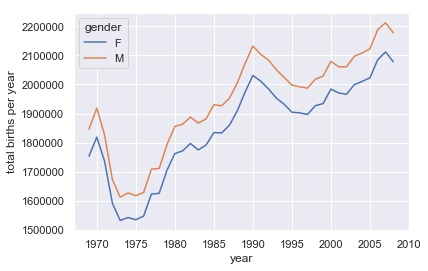

In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [260]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [261]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [262]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [263]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

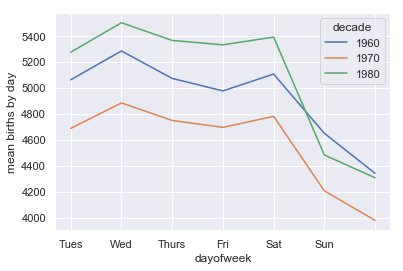

In [264]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
                   columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [265]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [266]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


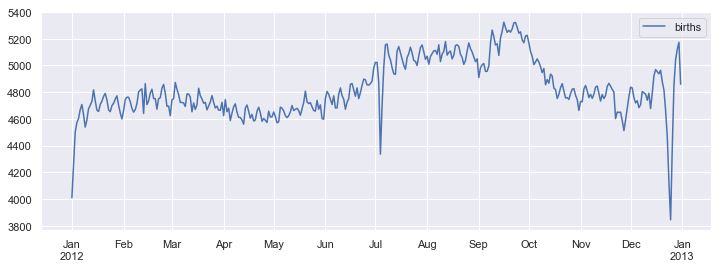

In [267]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

### Vectorized String Operations
One strength of Python is its relative ease in handling and manipulating string data. Pandas builds on this and provides a comprehensive set of vectorized string operations that become an essential piece of the type of munging required when one is working with (read: cleaning up) real-world data. In this section, we’ll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.
#### Introducing Pandas String Operations
We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [268]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This _vectorization_ of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done. For arrays of strings, NumPy does not provide such simple access, and thus you’re stuck using a more verbose loop syntax:

In [269]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

This is perhaps sufficient to work with some data, but it will break if there are any missing values. For example:

In [270]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the str attribute of Pandas Series and Index objects containing strings. So, for example, suppose we create a Pandas Series with this data:

In [271]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [272]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

#### Tables of Pandas String Methods
If you have a good understanding of string manipulation in Python, most of Pandas’ string syntax is intuitive enough that it’s probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties. The examples in this section use the following series of names:

In [273]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

#### Methods similar to Python string methods
Nearly all Python’s built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:

    len() lower() translate() islower()
    ljust() upper() startswith() isupper()
    rjust() find() endswith() isnumeric()
    center() rfind() isalnum() isdecimal()
    zfill() index() isalpha() split()
    strip() rindex() isdigit() rsplit()
    rstrip() capitalize() isspace() partition()
    lstrip() swapcase() istitle() rpartition()

In [274]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [275]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [276]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [277]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

<img src = "C:/Users/Michael/Pandas_aggregation.png"/>

#### Miscellaneous methods
**Vectorized item access and slicing.** The get() and slice() operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3). Note that this behavior is also available through Python’s normal indexing syntax—for example, df.str.slice(0, 3) is equivalent to df.str[0:3]:

In [278]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via df.str.get(i) and df.str[i] is similar.

These get() and slice() methods also let you access elements of arrays returned by split(). For example, to extract the last name of each entry, we can combine split() and get():

In [279]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

**Indicator variables.** Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A=“born in America,” B=“born in the United Kingdom,” C=“likes cheese,” D=“likes spam”:

In [280]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                                    'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The get_dummies() routine lets you quickly split out these indicator variables into a DataFrame:

In [281]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

In [282]:
# !curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
# !gunzip recipeitems-latest.json.gz
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Expected object or value


In [283]:
with open('E:/Python_4_DS/datasets/recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [290]:
# read the entire file into a Python array
with open('E:/Python_4_DS/datasets/recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

NameError: name 'data_json' is not defined

In [286]:
 recipes.shape

NameError: name 'recipes' is not defined

### Working with Time Series
Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time indexed data. Date and time data comes in a few flavors:
- Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).
- Time intervals and periods reference a length of time between a particular beginning and end point—for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and doesnot overlap (e.g., 24 hour-long periods constituting days).
- Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

### Dates and Times in Python
#### Native Python dates and times: datetime and dateutil
Python’s basic objects for working with dates and times reside in the built-in date time module. Along with the third-party dateutil module, you can use it to quickly perform a host of useful functionalities on dates and times. For example, you can manually build a date using the datetime type:

In [291]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the dateutil module, you can parse dates from a variety of string formats:

In [292]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week:

In [293]:
date.strftime('%A')

'Saturday'

#### Typed arrays of times: NumPy’s datetime64
The weaknesses of Python’s datetime format inspired the NumPy team to add a set of native time series data type to NumPy. The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The date time64 requires a very specific input format:

In [294]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [295]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [296]:
 np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [297]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [298]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Dates and times in Pandas: Best of both worlds
Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease of use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame; we’ll see many examples of this below.
For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [299]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [300]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [301]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time
Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has timeindexed data:

In [302]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a Series, we can make use of any of the Series indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [303]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [304]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures
This section will introduce the fundamental Pandas data structures for working with time series data:

- _For time stamps_, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python’s native datetime, but is based on the more efficient numpy.datetime64 data type. The associated index structure is DatetimeIndex.
- _For time periods_, Pandas provides the Period type. This encodes a fixedfrequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
- _For time deltas or durations_, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python’s native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. While these class objects can be invoked directly, it is more common to use the pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [306]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we’ll use 'D' to indicate daily frequency:

In [307]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A TimedeltaIndex is created, for example, when one date is subtracted from another:

In [308]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: pd.date_range() for timestamps, pd.period_range() for periods, and pd.timedelta_range() for time deltas. We’ve seen that Python’s range() and NumPy’s np.arange() turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [309]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start- and endpoint, but with a startpoint and a number of periods:

In [310]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

You can modify the spacing by altering the freq argument, which defaults to D. For example, here we will construct a range of hourly timestamps:

In [311]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of period or time delta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. Here are some monthly periods:

In [312]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

And a sequence of durations increasing by an hour:

In [313]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

<img src = 'C:/Users/Michael/Pictures/Frequency_offset.png'/>

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
- A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, you can modify the split-point of the weekly frequency by adding a three-letter weekday code:

- W-SUN, W-MON, W-TUE, W-WED, etc.

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [314]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module. For example, we can create a business day offset directly as follows:

In [315]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')